In [4]:
import sys
sys.path.insert(0,'../../')

from common import import_arff, test3

import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
rcParams['figure.figsize'] = (10, 5)
rcParams['figure.dpi'] = 150

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, f1_score, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## SINE

In [76]:
data_name = 'sine'
df = import_arff('../../data/SINE.arff')

In [77]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [78]:
svm = SVC(kernel='rbf', gamma=1, C=50)
rf = RandomForestClassifier(n_estimators= 400, min_samples_split= 10, min_samples_leaf= 2, max_features= 'auto', max_depth= 10, bootstrap= True, n_jobs=-1)
gbm = GradientBoostingClassifier(n_estimators= 400, max_depth= 10, learning_rate= 0.05)
xgb = XGBClassifier(min_child_weight= 7, max_depth= 10, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.7, n_jobs=-1)

In [79]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [80]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [81]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [82]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [83]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

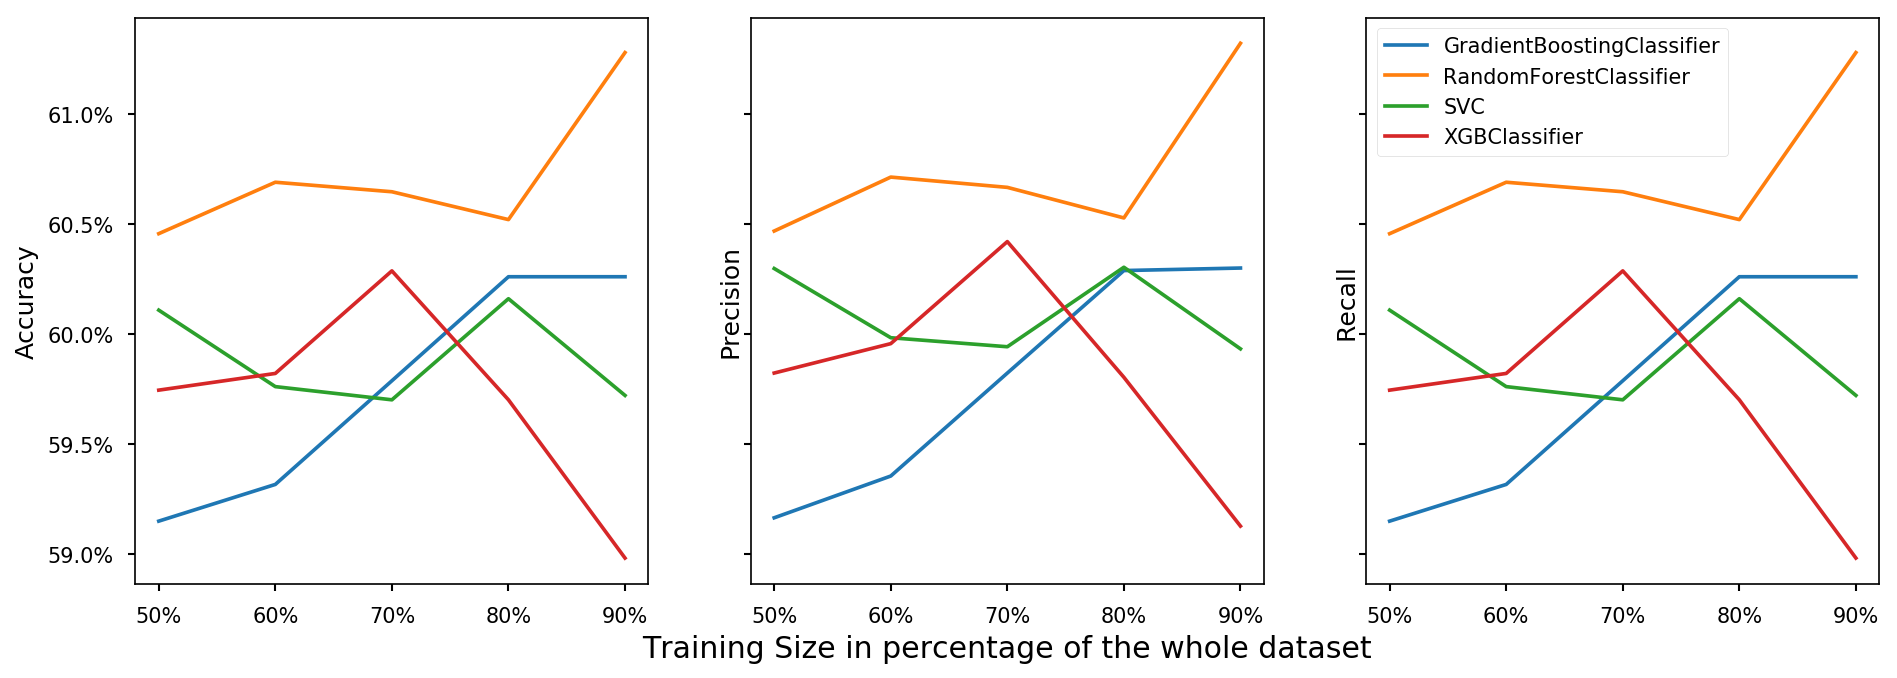

In [106]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Accuracy',  fontsize='large')
axes[1].set_ylabel('Precision',  fontsize='large')
axes[2].set_ylabel('Recall',  fontsize='large')
axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

## SEA Concepts

In [61]:
data_name = 'SEA'
df = import_arff('../../data/SEA.arff')

In [62]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [63]:
svm = SVC(kernel= 'rbf', gamma= 0.1, C= 0.5)
rf = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= True)
gbm = GradientBoostingClassifier(n_estimators= 800, max_depth= 10, learning_rate= 0.05)
xgb = XGBClassifier(min_child_weight= 7, max_depth= 3, learning_rate= 0.2, gamma= 0.3, colsample_bytree= 0.7)

In [64]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [65]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [66]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [67]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [68]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

Text(0.5, 0, 'Training Size in percentage of whole dataset')

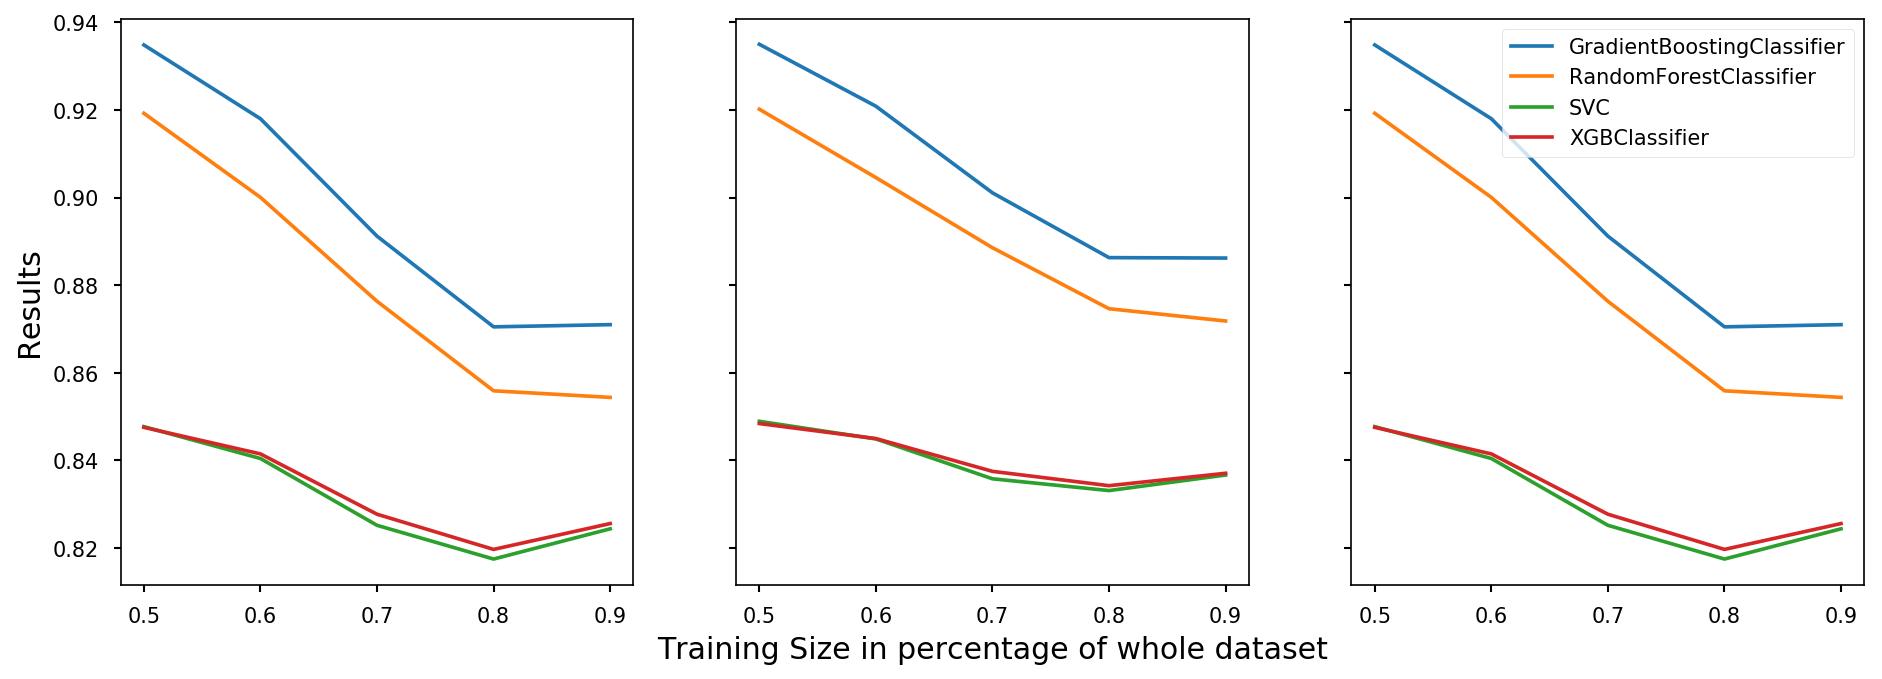

In [73]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Results',  fontsize='x-large')
axes[1].set_xlabel('Training Size in percentage of whole dataset', fontsize='x-large')

## Random RBF

In [85]:
data_name = 'rbf'
df = import_arff('../../data/RBF.arff')

In [86]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [87]:
svm = SVC(kernel= 'rbf', gamma= 1, C= 0.1)
rf = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 70, bootstrap= True)
gbm = GradientBoostingClassifier(n_estimators= 1400, max_depth= 10, learning_rate= 0.05)
xgb = XGBClassifier(min_child_weight= 7, max_depth= 6, learning_rate= 0.2, gamma= 0.0, colsample_bytree= 0.7)

In [88]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [89]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [90]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [91]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [92]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

Text(0.5, 0, 'Training Size in percentage of whole dataset')

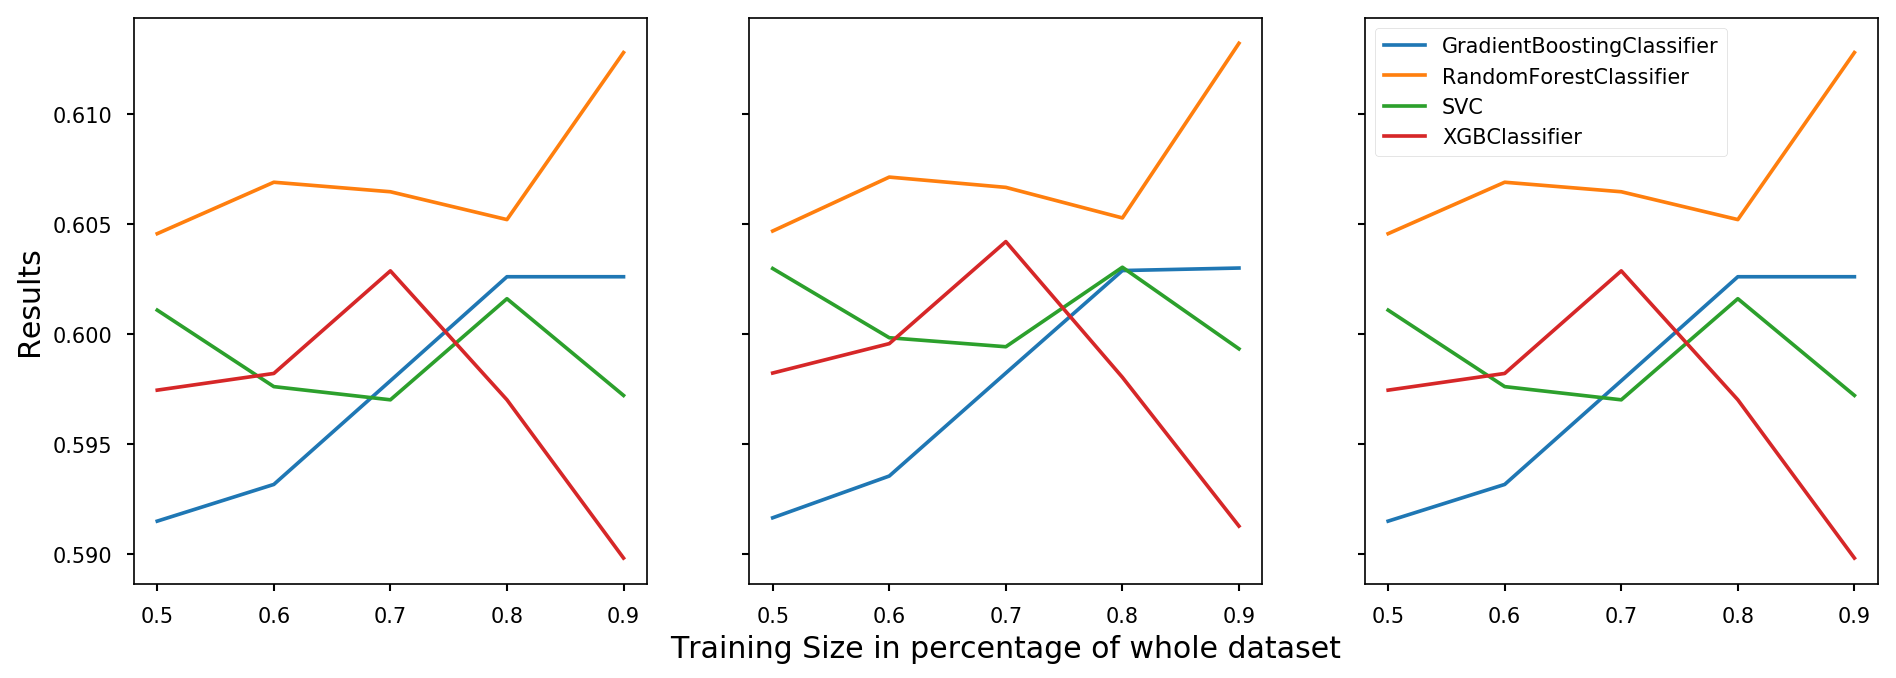

In [93]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Results',  fontsize='x-large')
axes[1].set_xlabel('Training Size in percentage of whole dataset', fontsize='x-large')

## Hyperplane

In [111]:
data_name = 'hyperplane'
df = import_arff('../../data/Hyperplane.arff')

In [112]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [113]:
svm = SVC(kernel= 'sigmoid', gamma= 0.1, C= 0.05)
rf = RandomForestClassifier(n_estimators= 2000, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap= True)
gbm = GradientBoostingClassifier(n_estimators= 1000, max_depth= 10, learning_rate= 0.005)
xgb = XGBClassifier(min_child_weight= 5, max_depth= 3, learning_rate= 0.05, gamma= 0.2, colsample_bytree= 0.7)

In [114]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [115]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [116]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [117]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [118]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

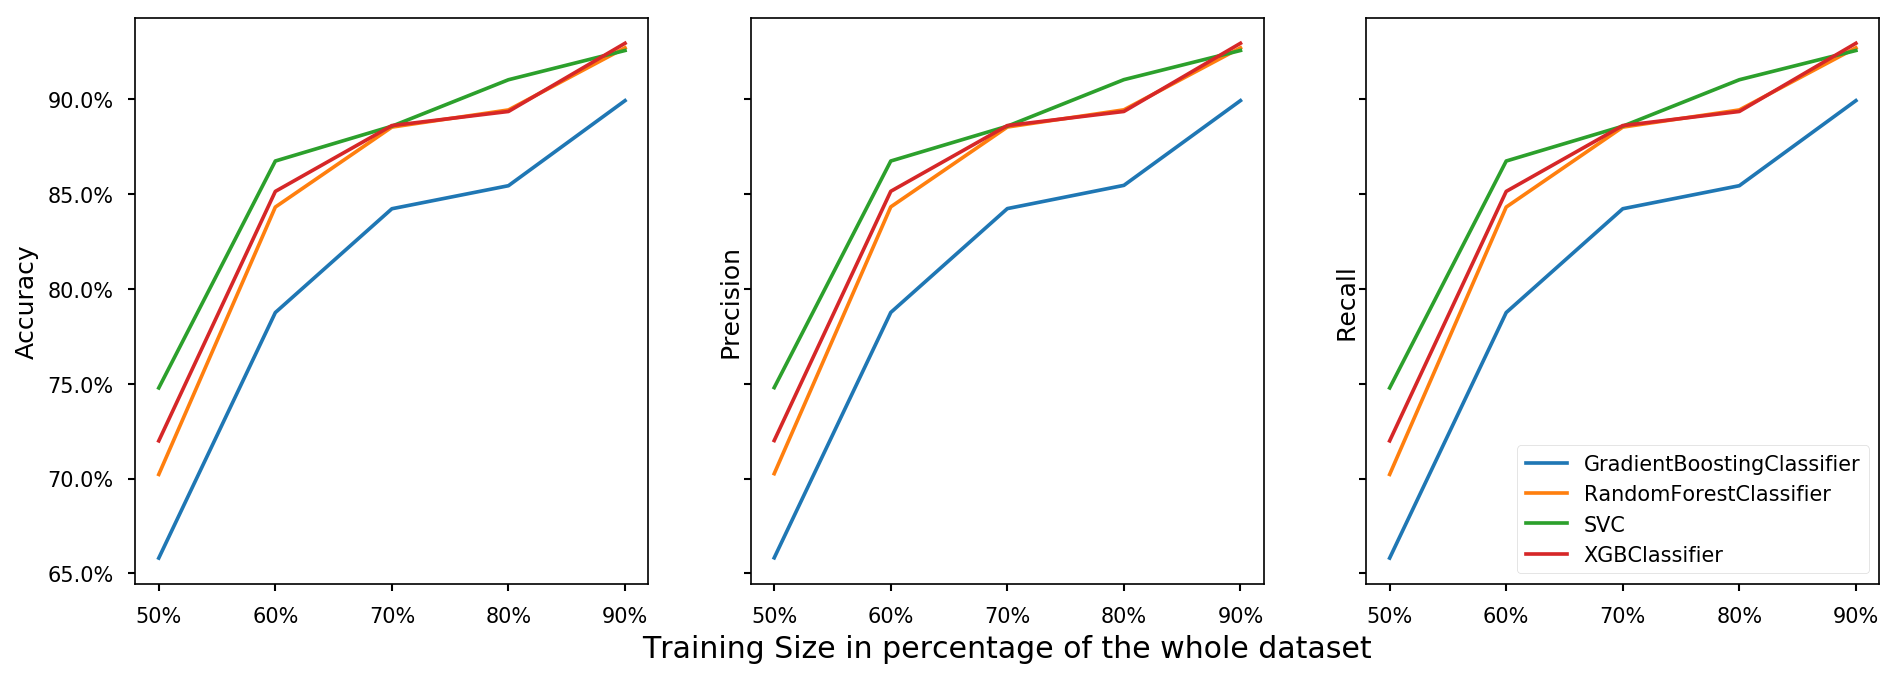

In [120]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Accuracy',  fontsize='large')
axes[1].set_ylabel('Precision',  fontsize='large')
axes[2].set_ylabel('Recall',  fontsize='large')
axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

## Covertype

In [121]:
data_name = 'covertype'
df = import_arff('../../data/covtypeNorm.arff')

In [126]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [133]:
df = df.apply(pd.to_numeric)

In [135]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [136]:
svm = SVC(kernel= 'poly', gamma= 1, C= 0.5)
rf = RandomForestClassifier(n_estimators= 1200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 40, bootstrap= False)
gbm = GradientBoostingClassifier(n_estimators= 1000, max_depth= 10, learning_rate= 0.05)
xgb = XGBClassifier(min_child_weight= 1, max_depth= 10, learning_rate= 0.25, gamma= 0.0, colsample_bytree= 0.7)

In [137]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [138]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [139]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


2 of 5 is completed for GradientBoostingClassifier


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


3 of 5 is completed for GradientBoostingClassifier


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [140]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [141]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

Text(0.5, 0, 'Training Size in percentage of whole dataset')

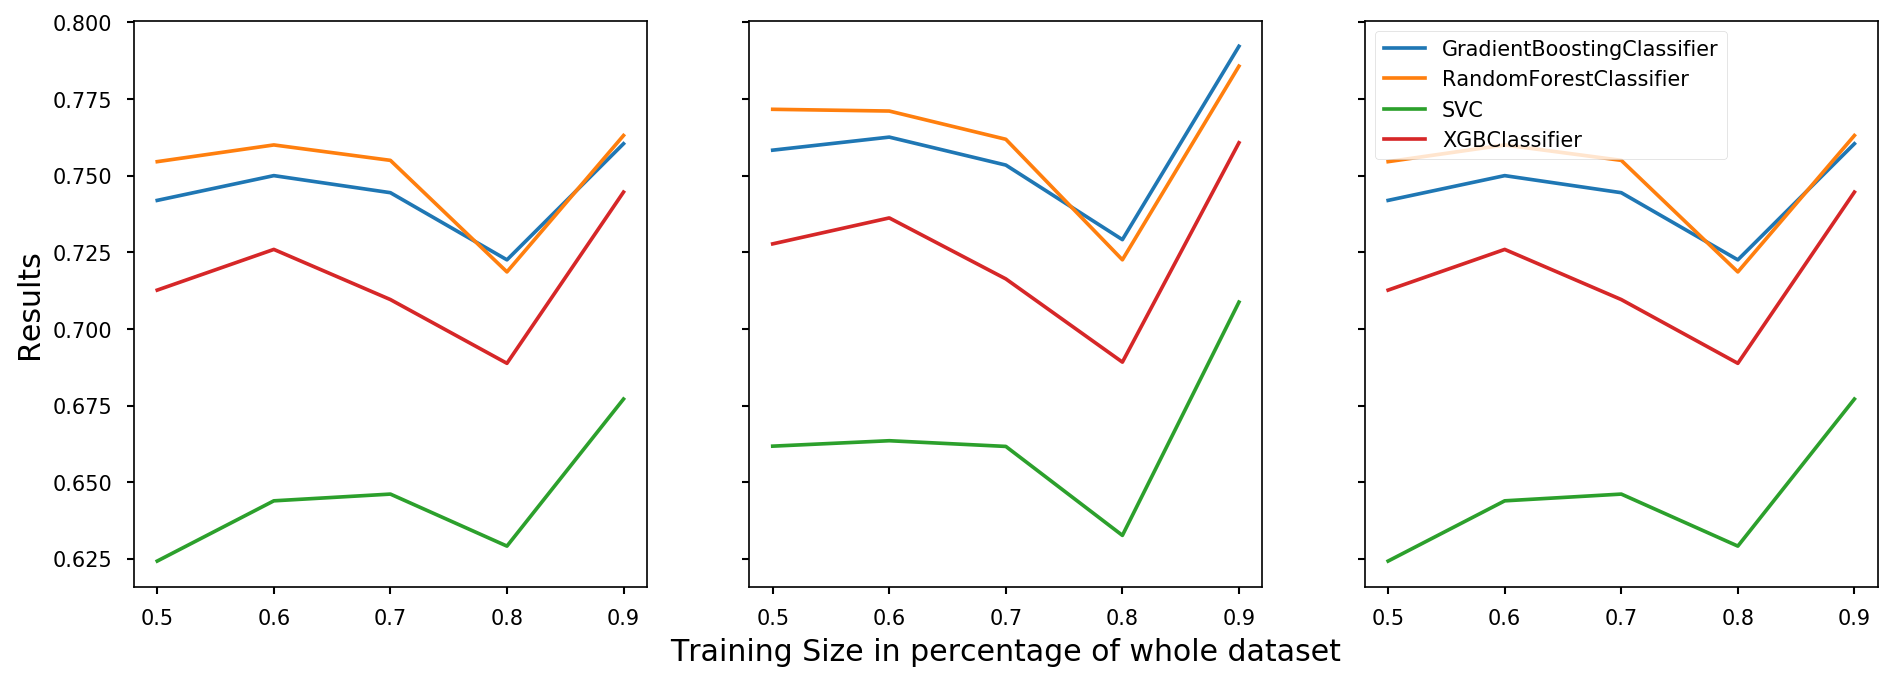

In [142]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Results',  fontsize='x-large')
axes[1].set_xlabel('Training Size in percentage of whole dataset', fontsize='x-large')

## Poker

In [3]:
data_name = 'poker'
df = import_arff('../../data/poker_preprocessed.arff')

In [5]:
df = df.apply(pd.to_numeric)

In [6]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

min_max = MinMaxScaler()
df.iloc[:,:-1] = min_max.fit_transform(df.iloc[:,:-1])

In [7]:
svm = SVC(kernel='poly', gamma=0.1, C=50)

In [8]:
svm_res = test3(svm, df)

/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 of 5 is completed for SVC


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2 of 5 is completed for SVC


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3 of 5 is completed for SVC


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4 of 5 is completed for SVC
5 of 5 is completed for SVC


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
svm_res

acc  precision    recall     kappa        f1
SVC 0.5  0.878295   0.882138  0.878295  0.781218  0.877146
    0.6  0.887169   0.888489  0.887169  0.793620  0.885240
    0.7  0.892045   0.893422  0.892045  0.803117  0.889336
    0.8  0.893151   0.895026  0.893151  0.797873  0.891002
    0.9  0.903076   0.902467  0.903076  0.823364  0.898876

In [10]:
svm_res.to_excel('poker_svm_results.xlsx')

## Elec

In [2]:
data_name = 'elec'
df = import_arff('../../data/elec_preprocessed.arff')

In [3]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 14 columns):
period       45312 non-null float64
nswprice     45312 non-null float64
nswdemand    45312 non-null float64
vicprice     45312 non-null float64
vicdemand    45312 non-null float64
transfer     45312 non-null float64
day_1        45312 non-null int64
day_2        45312 non-null int64
day_3        45312 non-null int64
day_4        45312 non-null int64
day_5        45312 non-null int64
day_6        45312 non-null int64
day_7        45312 non-null int64
class        45312 non-null int32
dtypes: float64(6), int32(1), int64(7)
memory usage: 4.7 MB


In [5]:
df.describe()

,period,nswprice,nswdemand,vicprice,vicdemand,transfer,day_1,day_2,day_3,day_4,day_5,day_6,day_7,class
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.141949,0.143008,0.143008,0.143008,0.143008,0.143008,0.143008,0.424545
std,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.349002,0.350085,0.350085,0.350085,0.350085,0.350085,0.350085,0.494279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
svm = SVC(kernel= 'rbf', gamma= 1, C= 100)
rf = RandomForestClassifier(n_estimators= 1400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 30, bootstrap= True, n_jobs=-1)
gbm = GradientBoostingClassifier(n_estimators= 1800, max_depth= 10, learning_rate= 0.05)
xgb = XGBClassifier(min_child_weight= 7, max_depth= 15, learning_rate= 0.05, gamma= 0.2, colsample_bytree= 0.7, n_jobs=-1)

In [7]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [8]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [9]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [10]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [11]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

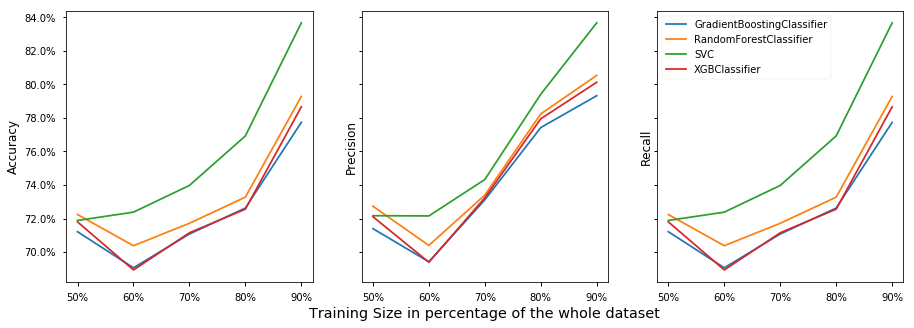

In [12]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Accuracy',  fontsize='large')
axes[1].set_ylabel('Precision',  fontsize='large')
axes[2].set_ylabel('Recall',  fontsize='large')
axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

## Gas Sensor

In [24]:
data_name = 'gassensor'
df = import_arff('../../data/GasSensor.arff')

In [25]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

min_max = MinMaxScaler()
df.iloc[:,:-1] = min_max.fit_transform(df.iloc[:,:-1])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 129 entries, attr0 to attr128
dtypes: float64(128), int64(1)
memory usage: 13.7 MB


In [27]:
df.describe()

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,attr65,attr66,attr67,attr68,attr69,attr70,attr71,attr72,attr73,attr74,attr75,attr76,attr77,attr78,attr79,attr80,attr81,attr82,attr83,attr84,attr85,attr86,attr87,attr88,attr89,attr90,attr91,attr92,attr93,attr94,attr95,attr96,attr97,attr98,attr99,attr100,attr101,attr102,attr103,attr104,attr105,attr106,attr107,attr108,attr109,attr110,attr111,attr112,attr113,attr114,attr115,attr116,attr117,attr118,attr119,attr120,attr121,attr122,attr123,attr124,attr125,attr126,attr127,attr128
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,0.097743,0.004889,0.077428,0.082711,0.027064,0.930313,0.853484,0.901573,0.141726,0.003865,0.118193,0.072992,0.017078,0.883381,0.894126,0.907187,0.411008,0.134677,0.106336,0.028103,0.004418,0.805016,0.888178,0.948335,0.438837,0.037545,0.031984,0.014282,0.001323,0.913715,0.977379,0.993754,0.315703,0.006829,0.066910,0.031163,0.011244,0.933227,0.977028,0.992693,0.331276,0.000147,0.055407,0.025805,0.011718,0.800933,0.929694,0.984816,0.368011,0.000725,0.190401,0.084896,0.050650,0.819422,0.779564,0.930519,0.374910,0.000403,0.178351,0.080747,0.065385,0.818334,0.778366,0.940299,0.108685,0.042981,0.099702,0.100744,0.065431,0.901934,0.890358,0.911050,0.084576,0.042627,0.076343,0.076935,0.063869,0.925528,0.877984,0.895875,0.288388,0.113234,0.217246,0.172276,0.082850,0.827219,0.808456,0.943762,0.302247,0.135552,0.222960,0.183094,0.062540,0.814119,0.803826,0.960454,0.345527,0.210459,0.276825,0.086785,0.021881,0.737885,0.914189,0.982769,0.349731,0.204961,0.297563,0.084587,0.020191,0.712211,0.912829,0.981302,0.257870,0.122389,0.207879,0.174709,0.065073,0.843580,0.778851,0.937924,0.266523,0.119475,0.221594,0.050192,0.097231,0.837852,0.771377,0.941584,2.387994
std,0.101601,0.010066,0.105399,0.109873,0.038353,0.096928,0.085277,0.073605,0.123563,0.009321,0.125960,0.076120,0.021171,0.125134,0.080855,0.077387,0.122496,0.107110,0.081939,0.027857,0.012234,0.157097,0.053141,0.033034,0.122917

In [28]:
svm = SVC(kernel= 'poly', gamma= 1, C= 0.5)
rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 70, bootstrap= False, n_jobs=-1)
gbm = GradientBoostingClassifier(n_estimators= 1800, max_depth= 10, learning_rate= 0.005)
xgb = XGBClassifier(min_child_weight= 1, max_depth= 15, learning_rate= 0.25, gamma= 0.0, colsample_bytree= 0.4, n_jobs=-1)

In [29]:
svm_res = test3(svm, df)

1 of 5 is completed for SVC
2 of 5 is completed for SVC
3 of 5 is completed for SVC
4 of 5 is completed for SVC
5 of 5 is completed for SVC


In [30]:
rf_res = test3(rf, df)

1 of 5 is completed for RandomForestClassifier
2 of 5 is completed for RandomForestClassifier
3 of 5 is completed for RandomForestClassifier
4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


In [31]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier
2 of 5 is completed for GradientBoostingClassifier
3 of 5 is completed for GradientBoostingClassifier
4 of 5 is completed for GradientBoostingClassifier
5 of 5 is completed for GradientBoostingClassifier


In [32]:
xgb_res = test3(xgb, df)

1 of 5 is completed for XGBClassifier
2 of 5 is completed for XGBClassifier
3 of 5 is completed for XGBClassifier
4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


In [33]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

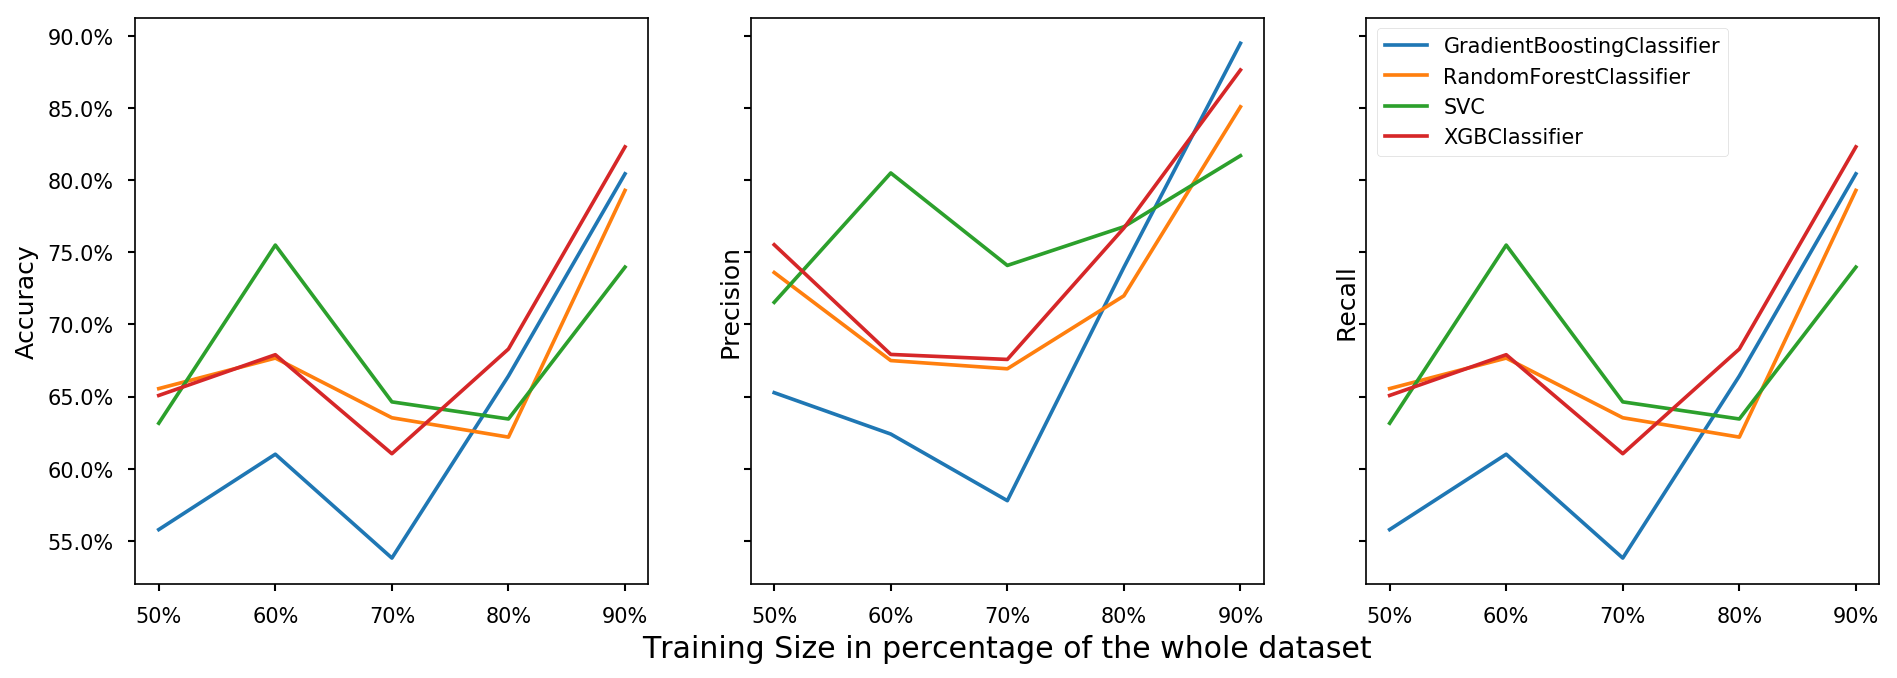

In [34]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Accuracy',  fontsize='large')
axes[1].set_ylabel('Precision',  fontsize='large')
axes[2].set_ylabel('Recall',  fontsize='large')
axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

## Poker

In [2]:
data_name = 'poker'
df = import_arff('../../data/poker_preprocessed.arff')

In [3]:
df = df.apply(pd.to_numeric)

In [4]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

min_max = MinMaxScaler()
df.iloc[:,:-1] = min_max.fit_transform(df.iloc[:,:-1])

In [11]:
df.describe()

,r1,r2,r3,r4,r5,s2_1,s2_2,s2_3,s2_4,s3_1,s3_2,s3_3,s3_4,s4_1,s4_2,s4_3,s4_4,s5_1,s5_2,s5_3,s5_4,class
count,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.00000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000,829201.000000
mean,0.146651,0.315705,0.499971,0.684248,0.853251,0.247283,0.250122,0.251561,0.251034,0.250248,0.249699,0.25055,0.249503,0.250985,0.251669,0.250504,0.246842,0.213141,0.236513,0.261861,0.288485,0.617082
std,0.158506,0.186822,0.197895,0.186809,0.158283,0.431433,0.433083,0.433911,0.433609,0.433156,0.432839,0.43333,0.432726,0.433580,0.433972,0.433303,0.431175,0.409527,0.424941,0.439647,0.453058,0.773735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.333333,0.583333,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.090909,0.333333,0.500000,0.666667,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.272727,0.416667,0.666667,0.833333,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [5]:
svm = SVC(kernel= 'poly', gamma= 0.1, C= 50)
rf = RandomForestClassifier(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth= 10, bootstrap= False, n_jobs=-1)
gbm = GradientBoostingClassifier(n_estimators= 1800, max_depth= 10, learning_rate= 0.01)
xgb = XGBClassifier(min_child_weight= 1, max_depth= 6, learning_rate= 0.25, gamma= 0.3, colsample_bytree= 0.7)

In [ ]:
svm_res = test3(svm, df)

In [6]:
rf_res = test3(rf, df)

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 of 5 is completed for RandomForestClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2 of 5 is completed for RandomForestClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3 of 5 is completed for RandomForestClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4 of 5 is completed for RandomForestClassifier
5 of 5 is completed for RandomForestClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
xgb_res = test3(xgb, df)

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 of 5 is completed for XGBClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2 of 5 is completed for XGBClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3 of 5 is completed for XGBClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4 of 5 is completed for XGBClassifier
5 of 5 is completed for XGBClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
gbm_res = test3(gbm, df)

1 of 5 is completed for GradientBoostingClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2 of 5 is completed for GradientBoostingClassifier


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3 of 5 is completed for GradientBoostingClassifier


In [ ]:
results = pd.concat([svm_res, rf_res, gbm_res, xgb_res])
results.to_excel(data_name+'_test3.xlsx')

In [ ]:
clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier']

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

for clf in clfs:
    axes[0].plot(results.loc[clf].acc, label=clf)
    axes[1].plot(results.loc[clf].precision, label=clf)
    axes[2].plot(results.loc[clf].recall, label=clf)
plt.legend()
axes[0].set_ylabel('Accuracy',  fontsize='large')
axes[1].set_ylabel('Precision',  fontsize='large')
axes[2].set_ylabel('Recall',  fontsize='large')
axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))